In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import export_graphviz
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
best_X = pd.read_pickle('best_X.pkl')
all_X = pd.read_pickle('all_X.pk3')
scaled_y = pd.read_pickle('scaled_y.pk4')

#### Using all_X (all features)

{'max_depth': 5, 'n_estimators': 200}
GridSearchSV Score: 0.9550827423167849
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        46
         1.0       0.86      0.92      0.89        60
         2.0       0.94      0.89      0.91        65
         3.0       0.96      0.96      0.96        53
         4.0       0.97      0.98      0.98        63
         5.0       0.99      0.97      0.98        69
         6.0       1.00      0.99      0.99        67

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Accuracy:  0.9550827423167849


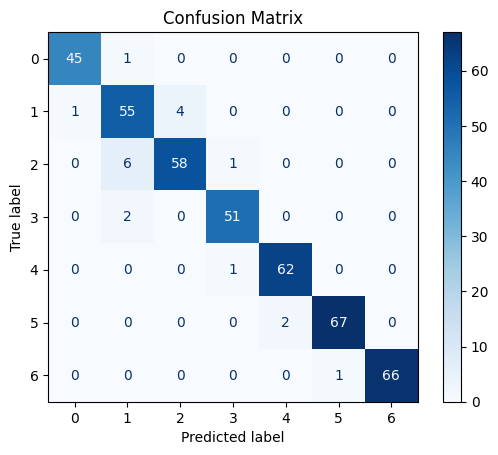

In [3]:
X_train, X_test, y_train, y_test = train_test_split(all_X, scaled_y, test_size = 0.2, random_state=1234)

# hyperparameter tuning with GridSearchCv
params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 200, 500]
          }

grid = GridSearchCV(xgb.XGBClassifier(), params, cv=10, scoring='accuracy', return_train_score=False)
grid = grid.fit(X_train, np.ravel(y_train))

print(grid.best_params_)
print('GridSearchSV Score:', grid.score(X_test, y_test))

# plug in the best hyperparameters determined above
xgb_dt_all = xgb.XGBClassifier(n_estimators=200, max_depth=5)

xgb_dt_all = xgb_dt_all.fit(X_train, np.ravel(y_train))

y_pred = xgb_dt_all.predict(X_test)
y_pred_probas = xgb_dt_all.predict_proba(X_test)

print(classification_report(y_test, y_pred)) # assumes 0.5 threshold as default
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_dt_all.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

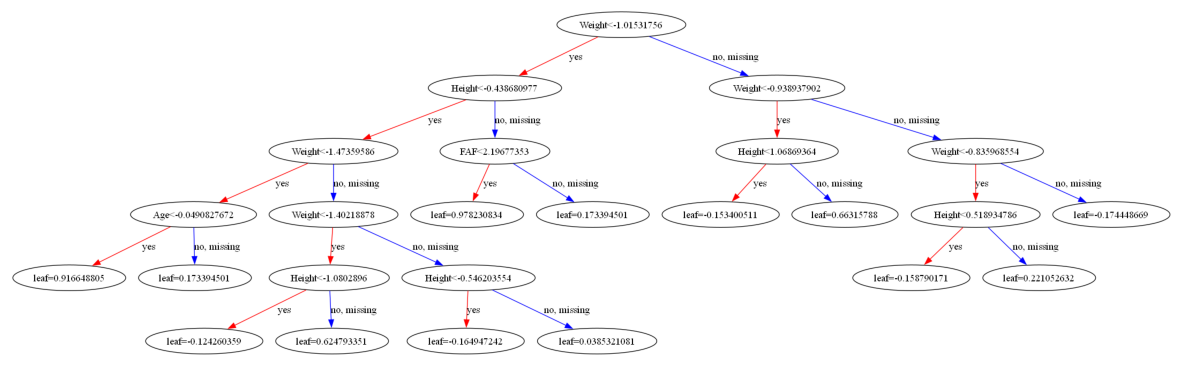

In [4]:
# visualize tree
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(xgb_dt_all, tree_idx=0, ax=ax)
plt.show()

# ROC Curve

# Precision-Recall Curve

#### Using best_X (best features)

{'max_depth': 5, 'n_estimators': 500}
GridSearchSV Score: 0.9621749408983451
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        46
         1.0       0.89      0.92      0.90        60
         2.0       0.94      0.91      0.92        65
         3.0       0.96      0.96      0.96        53
         4.0       0.98      0.98      0.98        63
         5.0       1.00      0.99      0.99        69
         6.0       1.00      1.00      1.00        67

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Accuracy:  0.9621749408983451


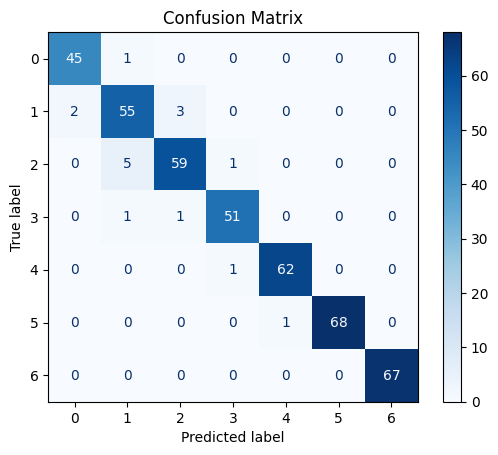

In [5]:
X_train, X_test, y_train, y_test = train_test_split(best_X, scaled_y, test_size = 0.2, random_state=1234)

# hyperparameter tuning with GridSearchCv
params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 200, 500]
          }

grid = GridSearchCV(xgb.XGBClassifier(), params, cv=10, scoring='accuracy', return_train_score=False)
grid = grid.fit(X_train, np.ravel(y_train))

print(grid.best_params_)
print('GridSearchSV Score:', grid.score(X_test, y_test))

# plug in the best hyperparameters determined above
xgb_dt_best = xgb.XGBClassifier(n_estimators=500, max_depth=5)

xgb_dt_best = xgb_dt_best.fit(X_train, np.ravel(y_train))

y_pred = xgb_dt_best.predict(X_test)
y_pred_probas = xgb_dt_best.predict_proba(X_test)

print(classification_report(y_test, y_pred)) # assumes 0.5 threshold as default
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_dt_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

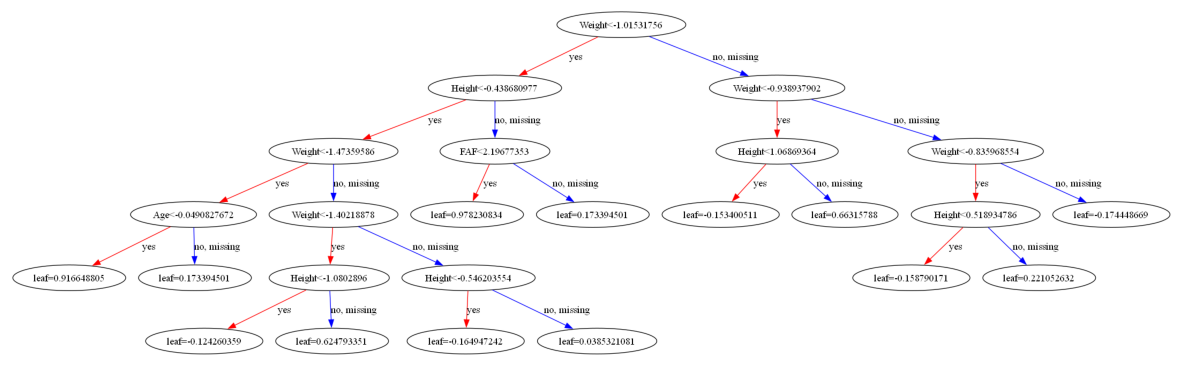

In [6]:
# visualize tree
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(xgb_dt_best, tree_idx=0, ax=ax)
plt.show()

# ROC Curve

# Precision-Recall Curve